# Age detector split data notebook
This notebook will split the data into training and validation samples.

## Import libraries

In [1]:
import pandas as pd
import shutil
from tqdm.notebook import tqdm

## Load data

In [2]:
data = pd.read_csv('./archive/labels.csv')

## First rows output

In [3]:
data.head(5)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


## Ages hist
This hist displays ages distribution. Labels is not balanced

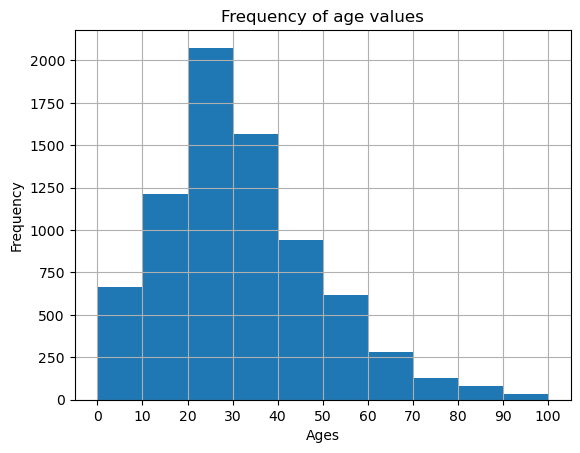

In [4]:
ax = data['real_age'].plot(
    kind='hist',
    bins=range(0, 101, 10),
    xticks=range(0, 101, 10),
    grid=True,
    title="Frequency of age values"
);
ax.set_xlabel("Ages");

## Adding a new column

In [5]:
# Function for categorization_ages (Example: 5 -> '0-10'; 15 -> '10-20' etc.)
def categorize_ages(age):
    for i in range(10):
        if 10 * i <= age < 10 * (i + 1):
            return f'{10 * i}-{10 * (i + 1)}'

In [6]:
data['categorize_ages'] = data['real_age'].apply(categorize_ages)

## Balancing data

C:\Users\gagar\AppData\Local\Temp\ipykernel_22364\2306089288.py:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test = data.loc[set(range(data.shape[0])) - set(list(train.index)), :]


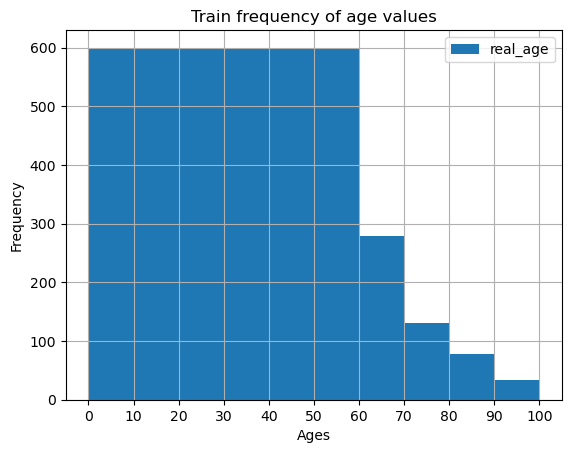

In [7]:
# Creating list for saving data
data_list = []

# Balancing data
for i in range(10):
    data_list.append(data.loc[list((data[data['categorize_ages'] == f'{10 * i}-{10 * (i + 1)}']).index[:600]), :])

# Creating train sample from balancing data
train = pd.concat(data_list)
# Creating test sample
test = data.loc[set(range(data.shape[0])) - set(list(train.index)), :]
# Hist output
ax = train.plot(
    kind='hist',
    bins=range(0, 101, 10),
    xticks=range(0, 101, 10),
    grid=True,
    title="Train frequency of age values"
);
ax.set_xlabel("Ages");

## Copying files

In [8]:
tqdm.pandas(desc='Copy files')

train['file_name'].progress_apply(lambda x: shutil.copy2(
    f"./archive/final_files/final_files/{x}",
    f"./archive/train_data/{x}"
))

Copy files:   0%|          | 0/4120 [00:00<?, ?it/s]

0       ./archive/train_data/000000.jpg
12      ./archive/train_data/000012.jpg
13      ./archive/train_data/000013.jpg
14      ./archive/train_data/000014.jpg
17      ./archive/train_data/000017.jpg
                     ...               
7197    ./archive/train_data/007215.jpg
7223    ./archive/train_data/007241.jpg
7338    ./archive/train_data/007360.jpg
7394    ./archive/train_data/007416.jpg
7504    ./archive/train_data/007526.jpg
Name: file_name, Length: 4120, dtype: object

In [9]:
tqdm.pandas(desc='Copy files')

test['file_name'].progress_apply(lambda x: shutil.copy2(
    f"./archive/final_files/final_files/{x}",
    f"./archive/test_data/{x}"
))

Copy files:   0%|          | 0/3471 [00:00<?, ?it/s]

2141    ./archive/test_data/002141.jpg
2146    ./archive/test_data/002146.jpg
2152    ./archive/test_data/002152.jpg
2154    ./archive/test_data/002154.jpg
2160    ./archive/test_data/002160.jpg
                     ...              
7586    ./archive/test_data/007608.jpg
7587    ./archive/test_data/007609.jpg
7588    ./archive/test_data/007610.jpg
7589    ./archive/test_data/007611.jpg
7590    ./archive/test_data/007612.jpg
Name: file_name, Length: 3471, dtype: object